# L'apprentissage "profond"

L'apprentissage profond - _Deep learning_ - est un sous ensemble de l'apprentissage machine. Concrètement, on parle d'apprentissage profond quand il y a plusieurs unités computationnelles organisées entre l'input et l'output. C'est ce qu'on appelle des "couches" (_layers_).

Les "réseaux de neurones" sont la technique à la base du _deep learning_.

# Réseaux de neurones

C'est une méthode qui se situe dans la continuité de l'approche du perceptron et qui a donc une longue [histoire](https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/History/history1.html):

- 1943: Warren McCulloch, Walter Pitts: comment fonctionnent les neurones

[Vagues: modes et oubli...](https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414).


## Pourquoi deep?

Dans certains cas des données ne sont pas traitables directement. Certaines données ne sont pas séparables linéairement, par exemple.



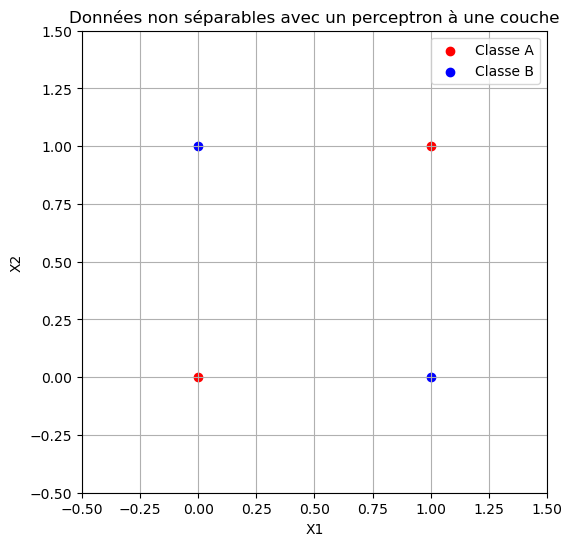

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Points
class_A = np.array([[0, 0], [1, 1]])  # Classe A (0)
class_B = np.array([[0, 1], [1, 0]])  # Classe B (1)

# Visualisation
plt.figure(figsize=(6, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], color='red', label='Classe A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='blue', label='Classe B')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.title('Données non séparables avec un perceptron à une couche')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()
plt.show()


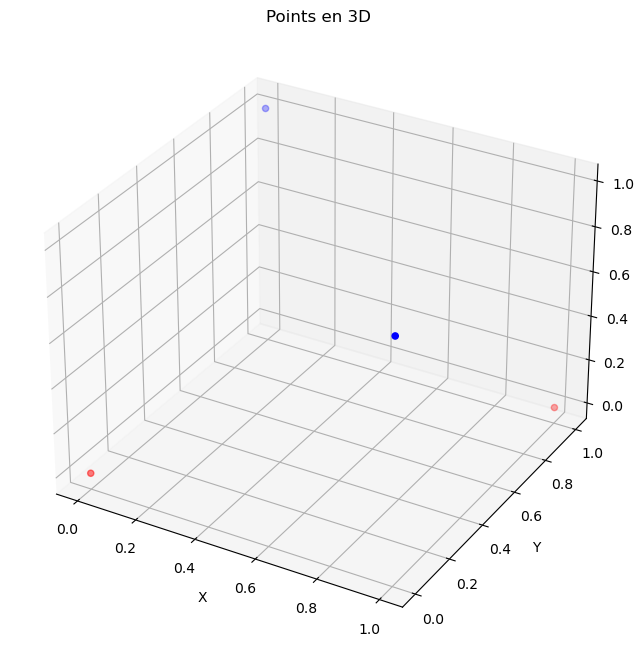

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Coordonnées des points
points = np.array([[0, 0, 0],   # Classe A
                   [1, 1, 0],   # Classe A
                   [0, 1, 1],   # Classe B
                   [1, 0, 1]])  # Classe B

# Couleurs des points
colors = ['red', 'red', 'blue', 'blue']  # Rouge pour Classe A, Bleu pour Classe B

# Création de la figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Affichage des points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, marker='o')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Points en 3D')

plt.show()


## Comment?

Comment faire "apprendre" une machine?

L'idée de l'interconnexion: chaque "neurone" est un élément qui "vote" pour quelque chose. On essaie de trouver les meilleures conditions pour que l'ensemble de ces votes donne le résultat attendu. De cette manière on aura une structure qui permet ensuite de donner un output à partir d'un input.


Cas typiques: la reconnaissance des chiffres manuscrites.



[Exemple du panier](https://www.lovelyanalytics.com/2017/06/14/reseaux-de-neurones-comment-ca-marche/)


C'est un problème philosophique intéressant qui peut être relié à la vieille question des universaux.

![](https://mlfromscratch.com/content/images/2019/12/neural-networks-3.png)


Pour une explication mathématique plus approfondie cf. [ici](https://mlfromscratch.com/neural-networks-explained/#/) - c'est de ce texte que j'ai pris les images.

Les étapes:

1. On prend une liste de inputs - un ensemble de noeuds avec des valeurs
2. On mets des poids aléatoires
3. On calcule les valeurs des noeuds de la couche cachée
4. On calcule la valeur de l'output
5. On regarde l'erreur par rapport à la valeur attendue pour l'output
6. On corrige les poids

Cela donne un modèle qui permet de calculer des outputs à partir de valeurs en entrée pour lesquelles on ne connait pas le résultats attendu.

C'est comme si, faisant ainsi, on déterminait des "caractéristiques" de chaque input qui sont représentée par les couches cachées.

## Caractéristiques

On a une couche avec des entrants (input layer), des couches intermédiaires "cachées" (hidden layers) et une couche de sortie (output layer).

L'idée est de faire en sorte que les neurones de chaque couche "votent" pour les neurones de la couche suivante jusqu'à arriver à un résultat final, qui sera le résultat de sortie.

Pour ce faire, chaque neurone aura un chiffre d'activation et des poids - différentes pour chaque neurone de la couche suivante.

## Calculer l'activation de chaque neurone dans la couche suivante

Si nous avons _n_ neurones dans la première couche, leurs activations peuvent être représentées avec un vecteur:

$$
\begin{bmatrix}
    a_0^{0}\\
    a_1^{0}\\
    \vdots \\
    a_n^{0}\\
    \end{bmatrix}
$$

Et leurs poids avec une matrice (car chaque neurone a un poids différent pour chaque neurone de la couche suivante et donc chaque ligne de la matrice représente l'ensemble des poids d'un neurone de la première couche sur tous les neurones, k, de la couche suivante).

$$
\begin{bmatrix}
    w_{0,0} & w_{0,1} & \cdots & w_{0,k}\\
    w_{1,0} & w_{1,1} & \cdots & w_{1,k}\\
    \vdots & \vdots & \ddots & \vdots \\
    w_{n,0} & w_{n,1} & \cdots & w_{n,k}\\
    \end{bmatrix}
$$

![](https://mlfromscratch.com/content/images/2019/12/input-to-hidden.png)

Dans ce cas:

$$
1.1 \times 0.3+2.6 \times 1.0 = 2.93
$$

## Rétropropagation

![Rétropropagation](https://mlfromscratch.com/content/images/2019/12/nn-complete.png)

Une fois qu'on a fait toutes les multiplications en utilisant des poids aléatoires, on peut regarder le résultat sur la dernière couche de neurones et regarder comment il diffère du résultat attendu.

À partir de cette différence on pourra revenir à l'arrière et ajuster les poids pour avoir un résultat plus proche de celui qu'on attendait. C'est ce qu'on fait avec la rétropropagation du gradient.


## Un exemple d'application

Admettons de vouloir entrainer un réseau de neurones à reconnaître des chiffres manuscrites.

![](https://en.mlab.ai/sites/default/files/inline-images/handwritten_numbers.png)

Nous allons avoir comme entrées une série d'images et comme sorties les chiffres de `0` à `9`.

Évidemment chaque image sera associée à un chiffre.

Ce corpus est ce qui nous sert pour entrainer le réseau de neurones.

Maintenant nous allons donner à notre réseau de neurones une image à la fois.

Par exemple nous pouvons imaginer que chaque pixel de l'image est un neurone d'input. Une image à 400 pixels aura donc 400 neurones. Admettons de travailler en noir et blanc: nous pouvons donner à chacun de ces neurones une valeur d'activation entre 0 (complètement blanc) et 1 (complètement noir).

Nous aurons ensuite une couche cachée avec un nombre plus réduit de neurones et des poids aléatoires. Et finalement un output qui devra avoir une valeur entre 0 et 9: c'est le chiffre associé à l'image.

![](https://en.mlab.ai/sites/default/files/inline-images/number_recognition_neural_network_2.png)

Admettons que l'image que nous avons donné comme input soit un `3`. Le réseau de neurones aura probablement donné un output différent (vu que les poids sont aléatoires). 

Nous allons donc corriger les poids pour essayer d'avoir le résultat attendu.

Nous allons répéter cela sur l'ensemble du corpus.
Nous aurons 10 modèles capable chacun de "reconnaître" un chiffre. Nous allons ensuite les mettre ensemble pour avoir 10 neurones de sortie. Cela nous donnera à la fin un algorithme capable de nous donner pour une image les probabilités qu'elle soit un des 10 chiffres.

Par exemple, en donnant à l'algorithme une image `x` l'algorithme donnera comme output quelque chose comme:

```
[ (0,0.2),
  (1, 0.1),
  (2, 0.3),
  (3, 0.1),
  (4, 0.0),
  (5, 0.4),
  (6, 0.1),
  (7, 0.9),
  (8, 0.2),
  (9, 0.3)
]
```
En nous indiquant ainsi que l'image est probablement un `7`.

L'algorithme aura donc "appris" des caractéristique des images qui lui permettent de les associer au bon chiffre.



**Ce qui pose problème est que ces "caractéristiques" (qui sont les activations et les poids des couches intermédiaires) ne semblent pas correspondre à quelque chose qu'un être humain serait capable de comprendre...**


